In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import matplotlib.colors as colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import copy
import math
import sys
import time
import pandas as pd
import decimal
sys.setrecursionlimit(2000)

In [2]:
# Define the font family and size
font = {'family' : 'serif', 'size' : 20 }
mpl.rc('font', **font)
mpl.rcParams['mathtext.fontset'] = 'cm' # Set the math font to Computer Modern
mpl.rcParams['legend.fontsize'] = 1

In [3]:
decimal.getcontext().prec = 100

c = 3e8
m_e = .511/c**2 # MeV/c^2
m_mu = 105.7/c**2 # MeV/c^2
d = 100 # m

m_l=m_e

m_A_min  = m_l*c**2*2/c**2 # MeV
m_A_line = 134.97685/2/c**2 # MeV
m_A_max  = 3*1000/c**2 # MeV
m_A      = 0.1 # MeV
deltaE_min = 10#1e-12 # MeV
deltaE_max =  3*1000 # MeV
nPoints_x = 20#600
nPoints_y = 20#1000

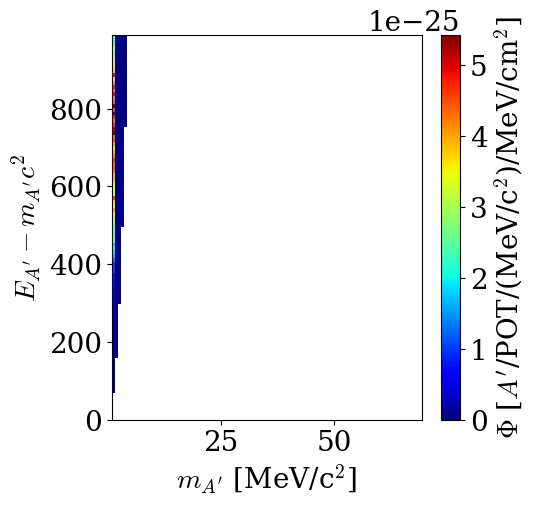

In [15]:
nRedecay = 100
nFiles = 10
flux_data     = pd.read_csv('flux_data_' + str(nRedecay) + 'RD_' + str(nFiles) + 'F.csv')
flux_settings = pd.read_csv('flux_settings_' + str(nRedecay) + 'RD_' + str(nFiles) + 'F.csv')

if flux_data.isnull().any().any(): raise ValueError('flux_data')
if flux_settings.isnull().any().any(): raise ValueError('flux_settings')

flux_data['m_B'] = pd.to_numeric(flux_data['m_B'], errors='coerce')
flux_data['deltaE'] = pd.to_numeric(flux_data['deltaE'], errors='coerce')

epsilon2 = 1e-10
# hbar = 6.582119569e-16/1000 # MeV s
POT = flux_settings['POT'][0]
m_A = 135  # MeV # pi0
m_C = 0    # MeV # gamma

# bins = []
fluxWeights = []
for index, row in flux_data.iterrows():
    m = row['m_B']
    E = row['deltaE'] + m
    
    g = E/m
    if g == 1: g = 1.000000001
    v=(c**2-c**2/g**2)**(1/2)
    t_i = (d/g)/v
    t_f = ((d+1.7)/g)/v
    # print(t_i,t_f,t_f-t_i)

    width_e  = 1/3 * 1/137 * epsilon2 * m * (1-4*m_e **2/m**2)**(1/2) * (1+2*m_e **2/m**2)
    width_mu = 1/3 * 1/137 * epsilon2 * m * (1-4*m_mu**2/m**2)**(1/2) * (1+2*m_mu**2/m**2)
    width = width_e + width_mu
    fudge = 1.51927e21
    width *= fudge
    # percentSurvive = math.e**(-width*t_i)
    # print(t_i/t_f)
    # print(math.e**(-width*t_i),percentSurvive)
    # width_d = decimal.Decimal(width)
    # e_d     = decimal.Decimal(math.e)
    # t_i_d   = decimal.Decimal(t_i)
    # t_f_d   = decimal.Decimal(t_f)
    percentSurvive = math.e**(-width*t_i)-math.e**(-width*t_f)
    # percentSurvive = e_d**(-width_d*t_i_d)-e_d**(-width_d*t_f_d)
    # percentSurvive = np.exp(-width*t_i)-np.exp(-width*t_f)
    # percentSurvive = float(percentSurvive)
    # print(percentSurvive)
    # print(width,t_i,t_f,math.e**(-width*t_i),math.e**(-width*t_f),math.e**(-width*t_i)-math.e**(-width*t_f))
    
    percentPi = 2 * epsilon2 * (1-m**2/m_A**2)**3
    
    flux_cur = row['nFlux']/9/100**2*percentPi*percentSurvive/POT
    # print(flux_cur)
    # bins.append([m,row['deltaE'],flux_cur])
    # fluxWeights.append(row['nFlux'])
    fluxWeights.append(flux_cur)
    # if flux_cur > 1: print(flux_cur)
    # print(flux_cur)
# print(fluxWeights)
# print(flux_data['m_B'].tolist()[0:1000])
# print(flux_data['deltaE'].tolist()[0:1000])
# print(flux[0:100])
# print(bins[0:1100])
# bins = np.array(bins)


fig_3, ax_3 = plt.subplots(figsize=(5, 5))
cmap = plt.cm.jet
cmap.set_under('white')
hist_3 = ax_3.hist2d(
    flux_data['m_B'].tolist(),
    flux_data['deltaE'].tolist(),
    bins=[flux_settings['m_B_nBins'][0], flux_settings['deltaE_nBins'][0]],
    cmap=plt.cm.jet,
    weights=fluxWeights,
    vmin=1e-40,
    # norm=colors.LogNorm(vmin=1e-40),
)
ax_3.set_xlabel(r"$m_{A'}$ [MeV/c$^2$]")
ax_3.set_ylabel(r"$E_{A'}-m_{A'}c^2$")
# ax_3.set_xlim(flux_settings['m_B_min'][0], flux_settings['m_B_max'][0])
# ax_3.set_ylim(flux_settings['deltaE_min'][0], flux_settings['deltaE_max'][0])
cbar = plt.colorbar(hist_3[3], ax=ax_3)
cbar.set_label(r"$\Phi$ [$A'$/POT/(MeV/c$^2$)/MeV/cm$^2$]")
# plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=1.2)
title = "flux.pdf"
plt.savefig(title,bbox_inches='tight')
plt.show()

In [6]:
nRedecay = 100
nFiles = 2
flux_data     = pd.read_csv('flux_data_' + str(nRedecay) + 'RD_' + str(nFiles) + 'F.csv')
flux_settings = pd.read_csv('flux_settings_' + str(nRedecay) + 'RD_' + str(nFiles) + 'F.csv')

if flux_data.isnull().any().any(): raise ValueError('flux_data')
if flux_settings.isnull().any().any(): raise ValueError('flux_settings')

flux_data['m_B'] = pd.to_numeric(flux_data['m_B'], errors='coerce')
flux_data['deltaE'] = pd.to_numeric(flux_data['deltaE'], errors='coerce')

epsilon = 0.00001
# hbar = 6.582119569e-16/1000 # MeV s
POT = decimal.Decimal(int(flux_settings['POT'][0]))
m_A = 135  # MeV # pi0
m_C = 0    # MeV # gamma

# bins = []
fluxWeights = []
for index, row in flux_data.iterrows():
    m = decimal.Decimal(row['m_B'])
    E = decimal.Decimal(row['deltaE']) + m
    # c = decimal.Decimal(c)
    one_half = decimal.Decimal("0.5")
    term = (E**2-m**2)/(m**2/c**2)
    if term < 0: print(term); term = decimal.Decimal("1e-20")
    # elif term == 0: print(term); term = decima.Decimal("
    
    v = (term/(1+term/c**2))**one_half
    g = 1/(1-v**2/c**2)**one_half
    if g < 0: print(g); g = decimal.Decimal("1e-20")
    
    d   = decimal.Decimal(d)
    # print("++++++++++++++++++++++++++")
    # print(d)
    # print(g)
    # print(term)
    # print(v)
    # print("++++++++++++++++++++++++++")
    t_i = (d/g)/v
    t_f = ((d+decimal.Decimal("1.7"))/g)/v
    
    epsilon = decimal.Decimal(epsilon)
    m_e     = decimal.Decimal(m_e)
    m_mu    = decimal.Decimal(m_mu)

    const = decimal.Decimal(1/3 * 1/137)
    width_e  = const * epsilon**2 * m * (1-4*m_e **2/m**2)**one_half * (1+2*m_e **2/m**2)
    width_mu = const * epsilon**2 * m * (1-4*m_mu**2/m**2)**one_half * (1+2*m_mu**2/m**2)
    width = width_e + width_mu
    percentSurvive = decimal.Decimal(math.e)**(-width*t_i) - decimal.Decimal(math.e)**(-width*t_f)
    
    percentPi = 2 * epsilon**2 * (1-m**2/m_A**2)**3

    flux_cur = decimal.Decimal(row['nFlux'])/POT*percentPi*percentSurvive
    # bins.append([m,row['deltaE'],flux_cur])
    # fluxWeights.append(row['nFlux'])
    fluxWeights.append(flux_cur)
    # if flux_cur > 1: print(flux_cur)
    # print(flux_cur)
# print(flux_data['m_B'].tolist()[0:1000])
# print(flux_data['deltaE'].tolist()[0:1000])
# print(flux[0:100])
# print(bins[0:1100])
# bins = np.array(bins)


fig_3, ax_3 = plt.subplots(figsize=(5, 5))
cmap = plt.cm.jet
cmap.set_under('white')
hist_3 = ax_3.hist2d(
    flux_data['m_B'].tolist(),
    flux_data['deltaE'].tolist(),
    # bins[:,0],
    # bins[:,1],
    bins=[flux_settings['m_B_nBins'][0], flux_settings['deltaE_nBins'][0]],
    cmap=plt.cm.jet,
    # cmap='viridis',
    # weights=bins[:,2],
    weights=fluxWeights,
    # weights=[bin[2] for bin in bins],
    vmin=1e-30,
    # norm=colors.LogNorm(vmin=1e-30),
)
ax_3.set_xlabel(r"$m_{A'}$ [MeV/c$^2$]")
ax_3.set_ylabel(r"$E_{A'}-m_{A'}c^2$")
# ax_3.set_xlim(flux_settings['m_B_min'][0], flux_settings['m_B_max'][0])
# ax_3.set_ylim(flux_settings['deltaE_min'][0], flux_settings['deltaE_max'][0])
cbar = plt.colorbar(hist_3[3], ax=ax_3)
cbar.set_label(r"$\Phi$ [$A'$/POT/(MeV/c$^2$)/MeV/9 m$^2$]")
# plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=1.2)
title = "flux.pdf"
plt.savefig(title,bbox_inches='tight')
plt.show()

TypeError: unsupported operand type(s) for /: 'decimal.Decimal' and 'float'

In [7]:
proints = []
for m in np.linspace(m_A_min, m_A_line, nPoints_x):
    for deltaE in np.linspace(deltaE_min, deltaE_max, nPoints_y):
        E = deltaE + m*c**2
        numerator   = m**2*c**2/2 - 2*m_l**2*c**2
        denominator = E**2/c**2 - m**2*c**2
        if numerator < 0 or denominator < 0: theta = 0
        else:                                theta = numerator**(1/2)/denominator**(1/2)
        theta = math.atan(theta)
        points.append((m,deltaE,theta))

fig_2, ax_2 = plt.subplots(figsize=(8, 2))
cmap = plt.cm.jet
cmap.set_under('white')  # Set zero-valued bins to white
hist = ax_2.hist2d(
    [m*c**2 for m,deltaE,theta in points],
    [deltaE for m,deltaE,theta in points],
    bins=[nPoints_x, nPoints_y],
    # cmap='rainbow',
    cmap=plt.cm.jet,
    weights=[theta for m,deltaE,theta in points],
    # norm=colors.LogNorm(vmin=0.001),  # Set vmin directly in LogNorm
    vmin=0.001
)
ax_2.set_xlabel(r"$m_{A'}$ [MeV/c$^2$]")
ax_2.set_ylabel(r"$E_{A'}-m_{A'}c^2$")
# ax.set_xlim([0, 6])
# ax.set_ylim([0,math.pi/math.pi*180])
cbar = plt.colorbar(hist[3], ax=ax_2)
cbar.set_label(r'$\theta_{max}$')
cbar.set_ticks([0, math.pi/2, math.pi])
cbar.set_ticklabels(['0', r'$\pi/2$', r'$\pi$'])

# ax_2.set_title("Preliminary", loc='right', fontsize=13, color='dimgray')
title = ""
if m_l == m_mu:
    ax_2.set_title(r"$A'\to\mu^+\mu^-$", loc='right', fontsize=16)
    title = "A --> mumu Angle - deltaE.pdf"
elif m_l == m_e:
    ax_2.set_title(r"$A'\to e^+e^-$", loc='right', fontsize=16)
    title = "A --> ee Angle - deltaE.pdf"

# fig.text(0.51, 0.90, r"ANNIE Preliminary Simulation", ha='center', va='center', rotation='horizontal',alpha=.6,size=14)
plt.savefig(title,bbox_inches='tight')

# Display the plot
plt.show()

NameError: name 'points' is not defined

For reference, it takes a photon 3.3333333333333335e-07 s or 333.3333333333333 ns to travel 100 m in an external frame


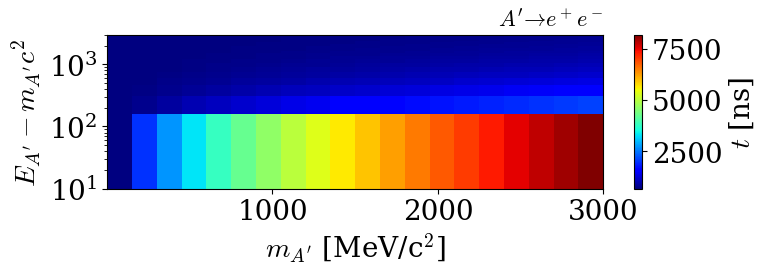

In [8]:
tScale = 1e-9

print('For reference, it takes a photon',d/c,'s or',d/c/tScale,'ns to travel',d,'m in an external frame')

points = []
for m in np.linspace(m_A_min, m_A_max, nPoints_x):
    for deltaE in np.linspace(deltaE_min, deltaE_max, nPoints_y):
        E = deltaE + m*c**2
        term = (E**2-m**2*c**4)/(m**2*c**2)
        v = (term/(1+term/c**2))**(1/2)
        t = d/v/tScale
        # time.sleep(.5)
        # print('E',E)
        # print('term',term)
        # print('v',v)
        # print('v/c',v/c)
        # print('t',t)
        # print('###############################')
        points.append((m,deltaE,t))

fig_2, ax_2 = plt.subplots(figsize=(8, 2))
cmap = plt.cm.jet
cmap.set_under('white')  # Set zero-valued bins to white
hist = ax_2.hist2d(
    [m*c**2 for m,deltaE,theta in points],
    [deltaE for m,deltaE,theta in points],
    bins=[nPoints_x, nPoints_y],
    # cmap='rainbow',
    cmap=plt.cm.jet,
    weights=[2*theta for m,deltaE,theta in points],
    # norm=colors.LogNorm(vmin=0.001),  # Set vmin directly in LogNorm
    # vmin=0.001
)
ax_2.set_xlabel(r"$m_{A'}$ [MeV/c$^2$]")
ax_2.set_ylabel(r"$E_{A'}-m_{A'}c^2$")
ax_2.set_yscale('log')
cbar = plt.colorbar(hist[3], ax=ax_2)
cbar.set_label(r'$t$ [ns]')
# cbar.set_ticks([0, math.pi/2, math.pi])
# cbar.set_ticklabels(['0', r'$\pi/2$', r'$\pi$'])

# ax_2.set_title("Preliminary", loc='right', fontsize=13, color='dimgray')
title = ""
if m_l == m_mu:
    ax_2.set_title(r"$A'\to\mu^+\mu^-$", loc='right', fontsize=16)
    # ax_2.text(426, 20.9, r"Time to SciBooNE (100 m)", ha='center', va='center', rotation='horizontal',alpha=1,size=14)
    title = "A --> mumu TTD - deltaE.pdf"
elif m_l == m_e:
    ax_2.set_title(r"$A'\to e^+e^-$", loc='right', fontsize=16)
    # ax_2.text(270, 20.9, r"Time to SciBooNE (100 m)", ha='center', va='center', rotation='horizontal',alpha=1,size=14)
    title = "A --> ee TTD - deltaE.pdf"

# fig.text(0.51, 0.90, r"ANNIE Preliminary Simulation", ha='center', va='center', rotation='horizontal',alpha=.6,size=14)
plt.savefig(title,bbox_inches='tight')

# Display the plot
plt.show()

For reference, it takes a photon 3e-06 s or 3000.0 ns to travel 900 m in an external frame


/tmp/ipykernel_56629/2985691193.py:27: RuntimeWarning: invalid value encountered in double_scalars
  v = (term/(1+term/c**2))**(1/2)


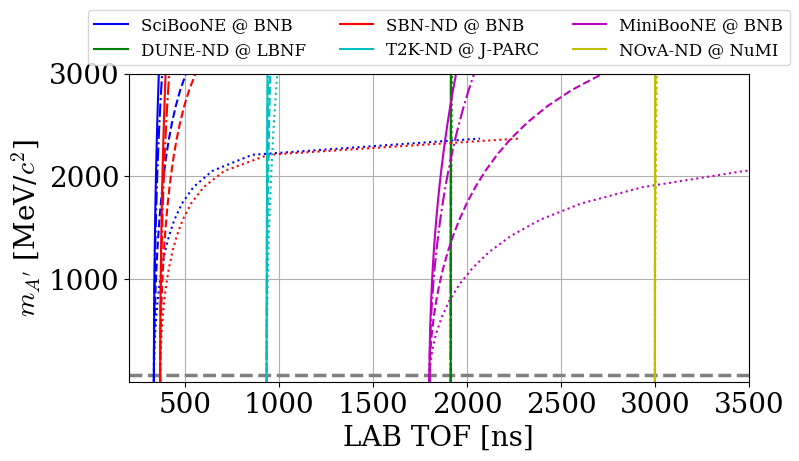

In [12]:
tScale = 1e-9
lab = True

print('For reference, it takes a photon',d/c,'s or',d/c/tScale,'ns to travel',d,'m in an external frame')

experiments = [(8,100,'SciBooNE @ BNB','b'),(120,574,'DUNE-ND @ LBNF','g'),(8,110,'SBN-ND @ BNB','r'),(30,280,'T2K-ND @ J-PARC','c'),(8,540,'MiniBooNE @ BNB','m'),(120,900,'NOvA-ND @ NuMI','y')]
percentEs = [(0.3,'dotted'),(0.5,'dashed'),(0.8,'dashdot'),(1,'solid')]

points = []
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(m_A_line*c**2, color='gray', linestyle='--',linewidth=2.5)
# ax.fill_between(, y:=[m_A_line,1000], where=(y >= m_A_line), alpha=0.3, color='red')
x = np.linspace(m_A_min,m_A_max,100)
ax.fill_between(x, [m_A_line*c**2 for i in x], [m_A_max*c**2 for i in x], alpha=0.3, color='red')

legendHandles = []
for E,d,name,color in experiments:
    E = E * 1000 # GeV --> MeV
    # E = E / 100
    for percentE,style in percentEs:
        points.append([])
        for m in np.linspace(m_A_min, m_A_max, nPoints_x):
            term = ((E*percentE)**2-m**2*c**4)/(m**2*c**2)
            # print(name,E*percentE)
            # print('term',term)
            # print('inside',term/(1+term/c**2))
            v = (term/(1+term/c**2))**(1/2)
            # print('v',v)
            g = 1/(1-v**2/c**2)**(1/2)
            t = (d/g)/v/tScale
            if lab: t = t*g
            points[-1].append((m*c**2,t))
        label = None
        if percentE == 1:
            label = name
        ax.plot([t for m,t in points[-1]], [m for m,t, in points[-1]], label=label, color=color, linestyle=style)
        if name == experiments[-1][2]:
            legendHandles.append(Line2D([], [], color='black', linestyle=style, label=(str(int(percentE*100)))+'%'))

if lab: ax.set_xlim(200,3500)
else: ax.set_xlim(0,10)
ax.set_ylim(m_A_min*c**2,m_A_max*c**2)
ax.set_ylabel(r"$m_{A'}$ [MeV/$c^2$]")
if lab: ax.set_xlabel(r'LAB TOF [ns]')
else: ax.set_xlabel(r'CM TOF [ns]')
ax.set_title(r'')
ax.legend(fontsize=12,loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
# plt.legend(fontsize=12, handles=legendHandles)
ax.grid(True)
if lab: plt.savefig('LAB TOF.pdf',bbox_inches='tight')
else: plt.savefig('CM TOF.pdf',bbox_inches='tight')
plt.show()

In [10]:
class vector3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def get_distance(self, v):
        return ((self.x - v.x)**2 + (self.y - v.y)**2 + (self.z - v.z)**2)**0.5

    def __str__(self):
        return f"({self.x}, {self.y}, {self.z})"

    def __add__(self, v):
        return vector3(self.x + v.x, self.y + v.y, self.z + v.z)

    def __mul__(self, other):
        if isinstance(other, (int, float)):
            return vector3(self.x * other, self.y * other, self.z * other)
        elif isinstance(other, vector3):
            return self.x * other.x + self.y * other.y + self.z * other.z
        else:
            raise TypeError("Multiplication not supported for the given types.")

    def __truediv__(self, c):
        return vector3(self.x / c, self.y / c, self.z / c)


class particle:
    def __init__(self, pdg, momentum, vertex):
        self.pdg = pdg
        self.momentum = momentum
        self.vertex = vertex

    def get_momentum(self):
        return (self.momentum.x**2 + self.momentum.y**2 + self.momentum.z**2)**0.5

    def get_energy(self):
        pdm = {111: 135.0, 211: 139.6, -211: 139.6, -1: 0.1}  # Geant4 code, mass
        return (self.get_momentum()**2 + pdm[self.pdg]**2)**0.5

    def __str__(self):
        return f"PDG: {self.pdg}, Momentum: {self.momentum}, Vertex: {self.vertex}"
    
class plane:
    def __init__(self, normal, corners):
        self.normal = normal
        self.corners = corners

    def is_vectorIntersect(self, vector):
        dot_product = np.dot(vector, self.normal)

        if np.abs(dot_product) < 1e-6:
            return False

        distance = np.dot(self.corners[0], self.normal) / dot_product

        intersection_point = vector3( vector.x * distance, vector.y * distance, vector.z * distance )

        return (self.corners[0].x <= intersection_point.x <= self.corners[2].x and
                self.corners[0].y <= intersection_point.y <= self.corners[2].y and
                self.corners[0].z <= intersection_point.z <= self.corners[2].z)


In [17]:
# Read pion data from CSV file
pions_data = pd.read_csv('pions.csv')
scale_momentum = 1000 # GeV --> MeV

# Create a list of Particle objects
pions = []
for index, row in pions_data.iterrows():
    pdg = row['pdg']
    momentum = vector3(row['px']*scale_momentum, row['py']*scale_momentum, row['pz']*scale_momentum)
    vertex = vector3(row['vx'], row['vy'], row['vz'])
    pion = particle(pdg, momentum, vertex)
    pions.append(pion)
    
# Sort pions by energy in assending order
sorted_pions = sorted(pions, key=lambda x: x.get_energy(), reverse=False)

# Print the list of pions
# for pion in pions:
#     print(pion)

In [18]:
nRedecays = 1
m_A = 135  # MeV # pi0
m_B = 0.1  # MeV # A'
m_C = 0    # MeV # gamma

# Create a list of dark photons
darkPhotons = []
for pion in pions:
    for decay in range(nRedecays):
        E_B = (m_C**2 - m_A**2 - m_B**2) / (-2 * pion.get_energy())
        scalar = math.sqrt((E_B**2 - m_B**2))# / (c**2))
        random_theta = np.random.rand() * 2 * math.pi
        random_z = np.random.rand() * 2 - 1
        random_direction = vector3( math.sqrt(1 - random_z**2) * math.cos(random_theta),
                                    math.sqrt(1 - random_z**2) * math.sin(random_theta),
                                    random_z )
        darkPhoton = particle(-1, pion.momentum / 2 + random_direction * scalar, pion.vertex)
        darkPhotons.append(darkPhoton)

# Print the list of dark photons
# for darkPhoton in darkPhotons:
#     print(darkPhoton)

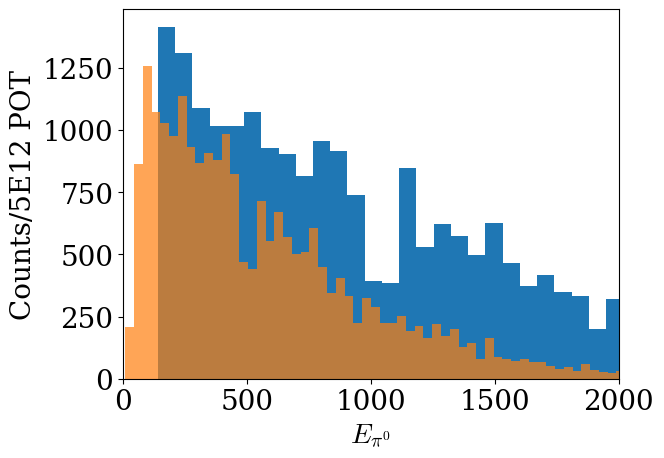

In [19]:
# print([pion.get_energy() for pion in pions])
plt.hist([pion.get_energy() for pion in pions], bins=100)
plt.hist([darkPhoton.get_energy() for darkPhoton in darkPhotons], bins=100, alpha=0.7)
plt.xlabel(r'$E_{\pi^0}$')
plt.ylabel('Counts/5E12 POT')
plt.xlim(0,2000)
plt.title('')
plt.show()

In [ ]:
plt.scatter([pion.momentum.z for pion in pions], [(pion.momentum.x**2+pion.momentum.y**2)**0.5 for pion in pions],alpha=0.2)
plt.scatter([dp.momentum.z for dp in darkPhotons], [(dp.momentum.x**2+dp.momentum.y**2)**0.5 for dp in darkPhotons],alpha=0.2)
plt.xlabel('$p_z$')
plt.ylabel('$p_r$')
plt.title('')
plt.show()

In [ ]:
plt.scatter([pion.vertex.z for pion in pions], [(pion.vertex.x**2+pion.vertex.y**2)**0.5 for pion in pions],alpha=0.2)
# plt.scatter([dp.vertex.z for dp in darkPhotons], [(dp.vertex.x**2+dp.vertex.y**2)**0.5 for dp in darkPhotons],alpha=0.2)
plt.xlabel('$v_z$')
plt.ylabel('$v_r$')
plt.title('')
plt.show()